![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Exercise 02 - Iris Classification </center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/Exercises/Exercise02_Classification.ipynb)

In [2]:
#-- For colab users:
#!pip install -U scikit-learn

In [3]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import matplotlib

matplotlib.rc('font', **{'size':16})

#### Load Iris data:

In [4]:
from sklearn import datasets

dIrisData        = datasets.load_iris(as_frame=True)
vY               = dIrisData['target']
dIris            = dIrisData['data']
dIris['Species'] = dIrisData['target_names'][vY]
dIris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
dIris['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

![Iris](https://www.pngkey.com/png/full/82-826789_iris-iris-sepal-and-petal.png)
Image from: https://www.pngkey.com/

#### Display basic information (useful to count NaNs in the data):

In [6]:
dIris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Basic statistics:

In [7]:
dIris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Count by target (species):

versicolor    50
virginica     50
setosa        50
Name: Species, dtype: int64

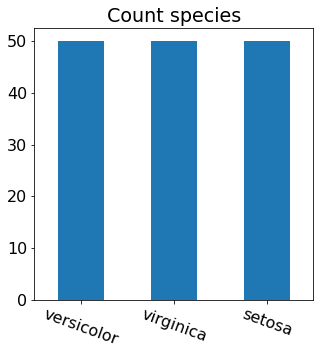

In [8]:
dIris['Species'].value_counts().plot(kind='bar', figsize=(5, 5), title='Count species', rot=-20)
dIris['Species'].value_counts()

#### Pair plot:

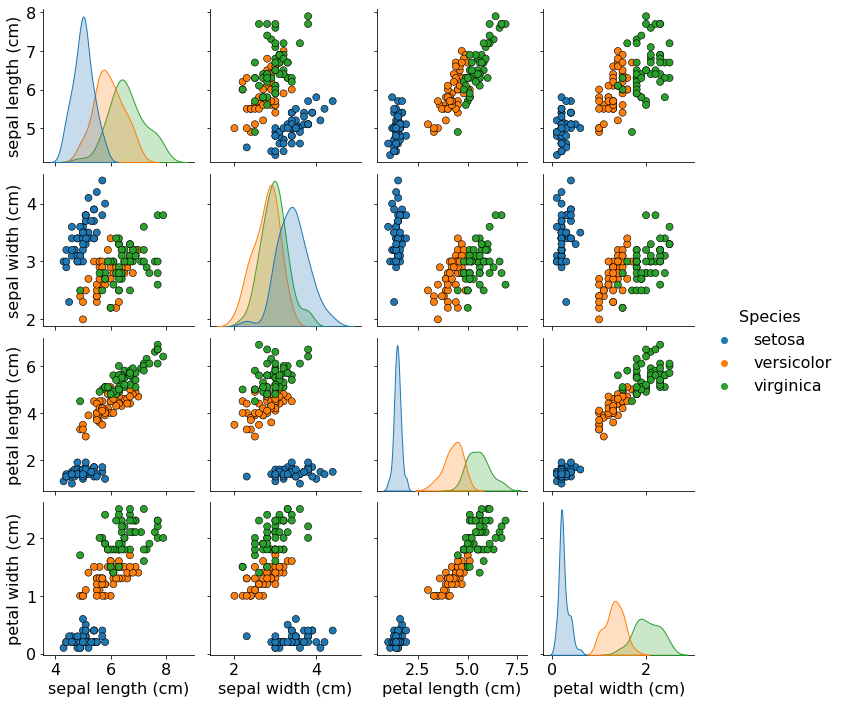

In [10]:
sns.pairplot(dIris, hue="Species", diag_kind='auto', plot_kws={'s':50, 'edgecolor':'k'})
plt.show()

### Prepare data for training:

In [11]:
dTrainX = dIris.drop(columns='Species')
display(dTrainX), vY

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


(None,
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 145    2
 146    2
 147    2
 148    2
 149    2
 Name: target, Length: 150, dtype: int32)

#### One can use either the data-frame `dTrain` or the ndarray `mX`

In [12]:
mX = dTrainX.values

mX.shape, dTrainX.shape, vY.shape

((150, 4), (150, 4), (150,))

### Exercise:
* Get the best leave one out cross validation accuracy on the Iris data (KFolds = 150).
* Try the different classifiers:
    * K-NN
    * Linear SVM
    * Kernel SVM
* For each classifier, try to find the optimal set of hyper-parameters.
* Plot the confusion matrices of the optimal classifier.